#NLP
목차 

1. 로이스 뉴스 데이터 

  1) 데이터 확인하기

  2) 데이터 복원하기
2. 벡터화하기
3. 나이브 베이즈 분류기
4. F-1 Score, Confusion Matrix
5. 다양한 모델 사용해보기 


회고

# 1.다양한 모델 사용해보기 : 모두사용


##1. 로이스 뉴스 데이터 

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### (1) 데이터 확인하기

#### 훈련 데이터와 테스트 데이터 로드하기

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

* num_words=10000 

: 1~10,000번 단어만 사용한다
(등장 빈도수가 높은 단어들만 사용)
* test_split = 0.2

: 전체 데이터 중에서 80%를 훈련 데이터, 20%를 테스트 데이터로 사용한다

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


#### 데이터 출력해보기

> 첫 번째 훈련용 뉴스와 첫 번째 테스트용 뉴스를 출력

In [4]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

* 텍스트가 아니라 숫자 시퀀스가 출력

각 단어가 빈도수가 높은 순서대로 낮은 정수로 맵핑되어 있음.

텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공.

> 첫 번째 훈련용 뉴스와 테스트용 뉴스의 레이블을 출력

In [5]:
print(y_train[0])
print(y_test[0])

3
3


> 현재 클래스의 개수 : 모든 레이블 중 최댓값을 구하고 1 더하기  

In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


#### 데이터 분포 확인해보기

> 뉴스 데이터의 길이 분포

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


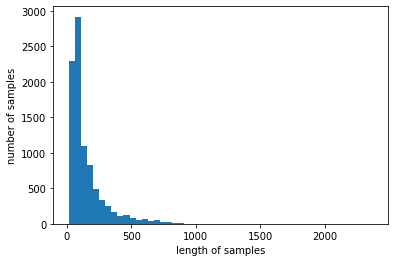

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

> 클래스의 분포 확인  (시각화) 

모델의 성능에 영향을 줄 수 있는 요소

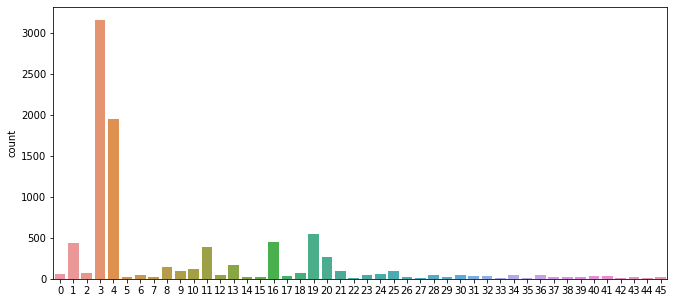

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

* 3번, 4번 클래스가 대부분을 차지

> 수치적으로 정확히 몇 개인지도 출력

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


### (2) 데이터 복원하기

#### 원본 뉴스 데이터로 복원해보기

> 정수 시퀀스로 변환된 데이터 >   다시 텍스트 데이터 

로이터 뉴스 데이터: 

'단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


word_index 안에 단어를 입력:  이 단어가 어떤 정수와의 맵핑 확인

* 'the' 맵핑 정수 확인

In [11]:
word_index['the']

1

* 'it' 맵핑 정수 확인

In [12]:
word_index['it']

13

> word_index에서 index_word를 만들 때, 각 정수에 +3

:word_index에 입력으로 했을 때, 얻는 숫자보다는 +3 을 한 숫자가 원래 고유한 숫자

In [13]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [14]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [15]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [16]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### OOV 문제와 UNK 토큰

단어장(Vocabulary) : 기계가 알고 있는 단어들의 집합

OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) :  기계가 미처 배우지 못한 모르는 단어

In [17]:
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

the transaction is expected to be completed


> 전체 훈련용 뉴스 데이터 > 텍스트 데이터로 변환

In [18]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [19]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

> 전체 테스트용 뉴스 데이터 > 텍스트 데이터로 변환

In [20]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [21]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

##2. 벡터화하기
>벡터화 방법 : Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


> DTM을 생성, DTM 크기 확인
* Document Term Matrix, DTM:
  사이킷런의 CountVectorizer()이용

In [23]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


>TF-IDF 생성, TF-IDF 크기 확인
* TF-IDF Matrix: 사이킷런의 TfidfTransformer() 이용

In [24]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


##3. 나이브 베이즈 분류기
* 사이킷런의 MultinomialNB()
* 약 66%의 정확도

In [25]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [26]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

 훈련 데이터와 동일한 전처리

 : 테스트 데이터도 TF-IDF 행렬로 변환

In [27]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [28]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

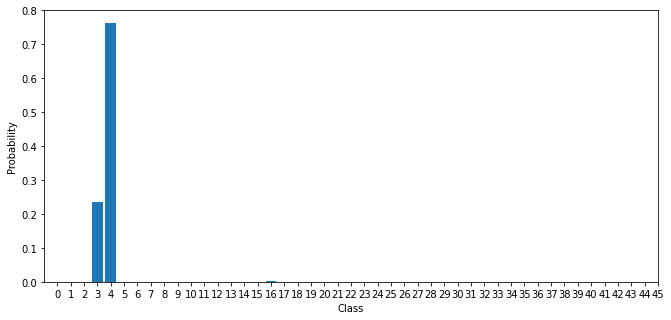

In [29]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [30]:
model.predict(tfidfv_test[3])

array([4])

## 4. F-1 Score, Confusion Matrix

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


### Precision, Recall & F1 Score

In [32]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

### Confusion Matrix

In [33]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


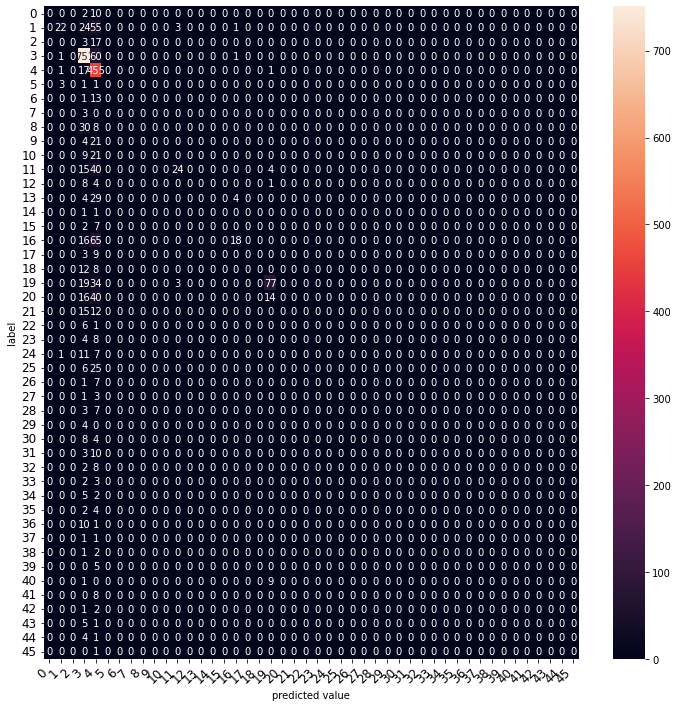

In [34]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 5. 다양한 머신러닝 기법

* CNB

In [35]:
CNB = ComplementNB()
CNB.fit(tfidfv, y_train)

predicted = CNB.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


* Logistic Regression

In [36]:
logistic_model = LogisticRegression(max_iter = 10 ** 4)
logistic_model.fit(tfidfv, y_train)


predicted = logistic_model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7920747996438112


* Linear Support Vector Machine

In [37]:
svm_model = LinearSVC()
svm_model.fit(tfidfv, y_train)


predicted = svm_model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8294746215494212


* Decision Tree

In [38]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(tfidfv, y_train)


predicted = decision_tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7003561887800535


* Random Forest 

In [39]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(tfidfv, y_train)


predicted = random_forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7422083704363313


* Gradient Boosting Classifer

In [40]:
gradient_boosting = GradientBoostingClassifier(random_state=32)
gradient_boosting.fit(tfidfv, y_train)


predicted = gradient_boosting.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7658058771148709


* Voting

In [46]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)


predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# pred = voting_classifier.predict(tfidfv)
# accuracy_score(X_test,pred)

# predicted = voting_classifier.fit(tfidfv, y_train)
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8183437221727515


In [47]:
# voting = VotingClassifier()
# voting.fit(tfidfv, y_train)


# predicted = voting.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 1.다양한 모델 사용해보기 : 빈도수 상위 5000개

## 1.데이터 로드

In [48]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 5000 , test_split=0.2)

In [49]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


## 2.데이터 복원

정수 시퀀스로 변환된 데이터 > 다시 텍스트 데이터

로이터 뉴스 데이터:

'단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공

In [50]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# print('=3')

word_index에서 index_word를 만들 때, 각 정수에 +3

 :word_index에 입력으로 했을 때, 얻는 숫자보다는 +3 을 한 숫자가 원래 고유한 숫자

In [51]:
index_to_word = { index+3 : word for word, index in word_index.items() }
# print('=3')

In [52]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
# print('=3')

단어장(Vocabulary) : 기계가 알고 있는 단어들의 집합

OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) : 기계가 미처 배우지 못한 모르는 단어

In [53]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [54]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


## 3.벡터화하기

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [56]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [57]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


## 4.다양한 머신러닝 모델 학습

In [58]:
# from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.naive_bayes import ComplementNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.svm import LinearSVC

# from sklearn.metrics import accuracy_score #정확도 계산

* MultinomialNB

In [59]:
MultinomialNB = MultinomialNB()
MultinomialNB.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = MultinomialNB.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


* Complement Naive Bayes Classifier(CNB)

In [60]:
CNB = ComplementNB()
CNB.fit(tfidfv, y_train)

predicted = CNB.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


* 로지스틱 회귀(Logistic Regression)

In [61]:
logistic_model = LogisticRegression(max_iter = 10 ** 4)
logistic_model.fit(tfidfv, y_train)


predicted = logistic_model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7974176313446126


* 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [62]:
svm_model = LinearSVC()
svm_model.fit(tfidfv, y_train)


predicted = svm_model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8290293855743545


* 결정 트리(Decision Tree)

In [63]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(tfidfv, y_train)


predicted = decision_tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6963490650044524


* 랜덤 포레스트(Random Forest)

In [64]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(tfidfv, y_train)


predicted = random_forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7684772929652716


* 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [65]:
gradient_boosting = GradientBoostingClassifier(random_state=32)
gradient_boosting.fit(tfidfv, y_train)


predicted = gradient_boosting.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


### 보팅(Voting)

In [66]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)


predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8161175422974176


In [67]:
# voting = VotingClassifier()
# voting.fit(tfidfv, y_train)


# predicted = voting.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 2.다양한 모델 사용해보기 : 빈도수 상위 10000개

## 1.데이터 로드

In [68]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 10000 , test_split=0.2)

In [69]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [70]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

## 2.데이터 복원

In [71]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [72]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [74]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [75]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


## 3.벡터화하기

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [77]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [78]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


## 4.다양한 머신러닝 모델 학습

In [81]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score #정확도 계산

* 1.MultinomialNB

In [82]:
MultinomialNB = MultinomialNB()
MultinomialNB.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = MultinomialNB.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


* 2.CNB

In [83]:
CNB = ComplementNB()
CNB.fit(tfidfv, y_train)


predicted = CNB.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


* 3.Logistic Regression

In [84]:
logistic_model = LogisticRegression(max_iter = 10 ** 4)
logistic_model.fit(tfidfv, y_train)


predicted = logistic_model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7951914514692787


* 4.Linear Support Vector Machine

In [85]:
svm_model = LinearSVC()
svm_model.fit(tfidfv, y_train)


predicted = svm_model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8299198575244879


* 5.Decision Tree

In [86]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(tfidfv, y_train)



predicted = decision_tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.692787177203918


* 6.Random Forest 

In [87]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(tfidfv, y_train)



predicted = random_forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.751113089937667


* 7.Gradient Boosting Classifer

In [88]:
gradient_boosting = GradientBoostingClassifier(random_state=32)
gradient_boosting.fit(tfidfv, y_train)


predicted = gradient_boosting.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

KeyboardInterrupt: ignored

* 8.Voting

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)


predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 3.RNN 모델과 비교

### 데이터 로드

In [89]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 5000 , test_split=0.2)

In [90]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [91]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

### 데이터 복원

In [92]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [93]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [95]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [96]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


###  벡터화

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [98]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [99]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


### 딥러닝 모델 학습

In [100]:
import tensorflow as tf

In [114]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 32  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터) # 깊을수록 과적합 / 연산량 증가 

# model 설계 - LSTM

model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_lstm.add(tf.keras.layers.Dense(8, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.


model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321,393
Trainable params: 321,393
Non-trainable params: 0
_________________________________________________________________


In [115]:
print(tfidfv.shape)
print(y_train.shape)

(5748, 4867)
(5748,)


In [116]:
from sklearn.model_selection import train_test_split

tfidfv, tfidfv_val, y_train, y_val = train_test_split(tfidfv, y_train, test_size = 0.2)

In [117]:
tfidfv

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07578696, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [118]:
# tfidfv = tfidfv.toarray()
# tfidfv_val = tfidfv_val.toarray()
# tfidfv_test = tfidfv_test.toarray()

In [119]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_lstm.fit(tfidfv,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(tfidfv_val, y_val),
                    verbose=1)

Epoch 1/20
9/9 [==============================] - 4s 247ms/step - loss: 0.6830 - accuracy: 0.0383 - val_loss: 0.6187 - val_accuracy: 0.0504
Epoch 2/20
9/9 [==============================] - 2s 196ms/step - loss: 0.5846 - accuracy: 0.0468 - val_loss: 0.5420 - val_accuracy: 0.0504
Epoch 3/20
9/9 [==============================] - 2s 197ms/step - loss: 0.5100 - accuracy: 0.0468 - val_loss: 0.4663 - val_accuracy: 0.0504
Epoch 4/20
9/9 [==============================] - 2s 196ms/step - loss: 0.4348 - accuracy: 0.0468 - val_loss: 0.3908 - val_accuracy: 0.0504
Epoch 5/20
9/9 [==============================] - 2s 211ms/step - loss: 0.3594 - accuracy: 0.0468 - val_loss: 0.3157 - val_accuracy: 0.0504
Epoch 6/20
9/9 [==============================] - 2s 198ms/step - loss: 0.2849 - accuracy: 0.0468 - val_loss: 0.2402 - val_accuracy: 0.0504
Epoch 7/20
9/9 [==============================] - 2s 263ms/step - loss: 0.2096 - accuracy: 0.0468 - val_loss: 0.1650 - val_accuracy: 0.0504
Epoch 8/20
9/9 [====

In [107]:
results = model_lstm.evaluate(tfidfv_test,  y_test, verbose=2)

print(results)

71/71 - 10s - loss: -5.6111e+01 - accuracy: 0.0467 - 10s/epoch - 140ms/step
[-56.11125183105469, 0.0467497780919075]


#결론
1. 머신러닝 학습 과정에서 다른 모델들에 비해 linear SVC 와 voting이 비슷하게 좋은 성능을 보였다. (num_words =전체, 5000, 10000 에 관계없이 비슷하게 나옴)

2. 딥러닝 모델의 결과 0.0467로 정확도가 매우 낮게 나옴.



# 회고

### - 이번 프로젝트에서 **어려웠던 점**.

모델 학습을 하는데 생각보다 시간이 매우 많이 걸렸다.

### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

여러가지 머신러닝 모델에 대해 다시 공부해보는 기회가 되었다. 

### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.


>#### **루브릭평가 지표**
>|번호|평가문항|상세기준|
>|:---:|---|---|
>|1| 분류 모델의 accuracy가 기준 이상 높게 나왔는가? |3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.
>|2|분류 모델의 F1 score가 기준 이상 높게 나왔는가?| Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.|
>|3|딥러닝 모델을 활용해 성능이 비교 및 확인되었는가?|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.|



### - **자기 다짐**

- 함수로 코드 간단하게 만들어보기 

### - **참고**
